# Stock Price Volatility Model
## Table of Content
* [1. Loading the Data ](#loading-data)
* [2. Visualize the closing price history](#visualize)
* [3. Scaling Data](#scaling)
* [4. Create the training dataset](#train)
* [5. Build the LSTM model](#build)
### 1. Loading the Data <a class='anchor' id='loading-data'></a>

In [1]:
# import the data
import pandas as pd
import numpy as np
import math
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense ,LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
# load the data
fpt_df=pd.read_csv('./data/FPT.csv')
msn_df=pd.read_csv('./data/MSN.csv')
vic_df=pd.read_csv('./data/VIC.csv')
pnj_df=pd.read_csv('./data/PNJ.csv')

In [8]:
fpt_df.head()

,Ticker,Date/Time,Open,High,Low,Close,Volume,Open Interest
0,FPT,12/25/2018 9:15,30.89,30.89,30.89,30.89,35410,0
1,FPT,12/25/2018 9:16,30.81,30.81,30.81,30.81,190,0
2,FPT,12/25/2018 9:17,30.74,30.81,30.74,30.74,1120,0
3,FPT,12/25/2018 9:18,30.74,30.74,30.74,30.74,2120,0
4,FPT,12/25/2018 9:19,30.74,30.74,30.74,30.74,22500,0


In [10]:
# get the number of rows and column in the data set
fpt_df.shape,msn_df.shape,vic_df.shape,pnj_df.shape

((97406, 8), (135354, 8), (101266, 8), (125309, 8))

### 2. Visualize the closing price history <a class='anchor' id='visualize'></a>

In [3]:
fpt_df['Date/Time']=pd.to_datetime(fpt_df['Date/Time'])
fpt_df.sort_values('Date/Time', inplace=True)

In [4]:
msn_df['Date/Time']=pd.to_datetime(msn_df['Date/Time'])
msn_df.sort_values('Date/Time', inplace=True)

In [5]:
pnj_df['Date/Time']=pd.to_datetime(pnj_df['Date/Time'])
pnj_df.sort_values('Date/Time', inplace=True)

In [6]:
vic_df['Date/Time']=pd.to_datetime(vic_df['Date/Time'])
vic_df.sort_values('Date/Time', inplace=True)

In [20]:
fpt_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97406 entries, 0 to 97405
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Ticker         97406 non-null  object        
 1   Date/Time      97406 non-null  datetime64[ns]
 2   Open           97406 non-null  float64       
 3   High           97406 non-null  float64       
 4   Low            97406 non-null  float64       
 5   Close          97406 non-null  float64       
 6   Volume         97406 non-null  int64         
 7   Open Interest  97406 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(2), object(1)
memory usage: 5.9+ MB


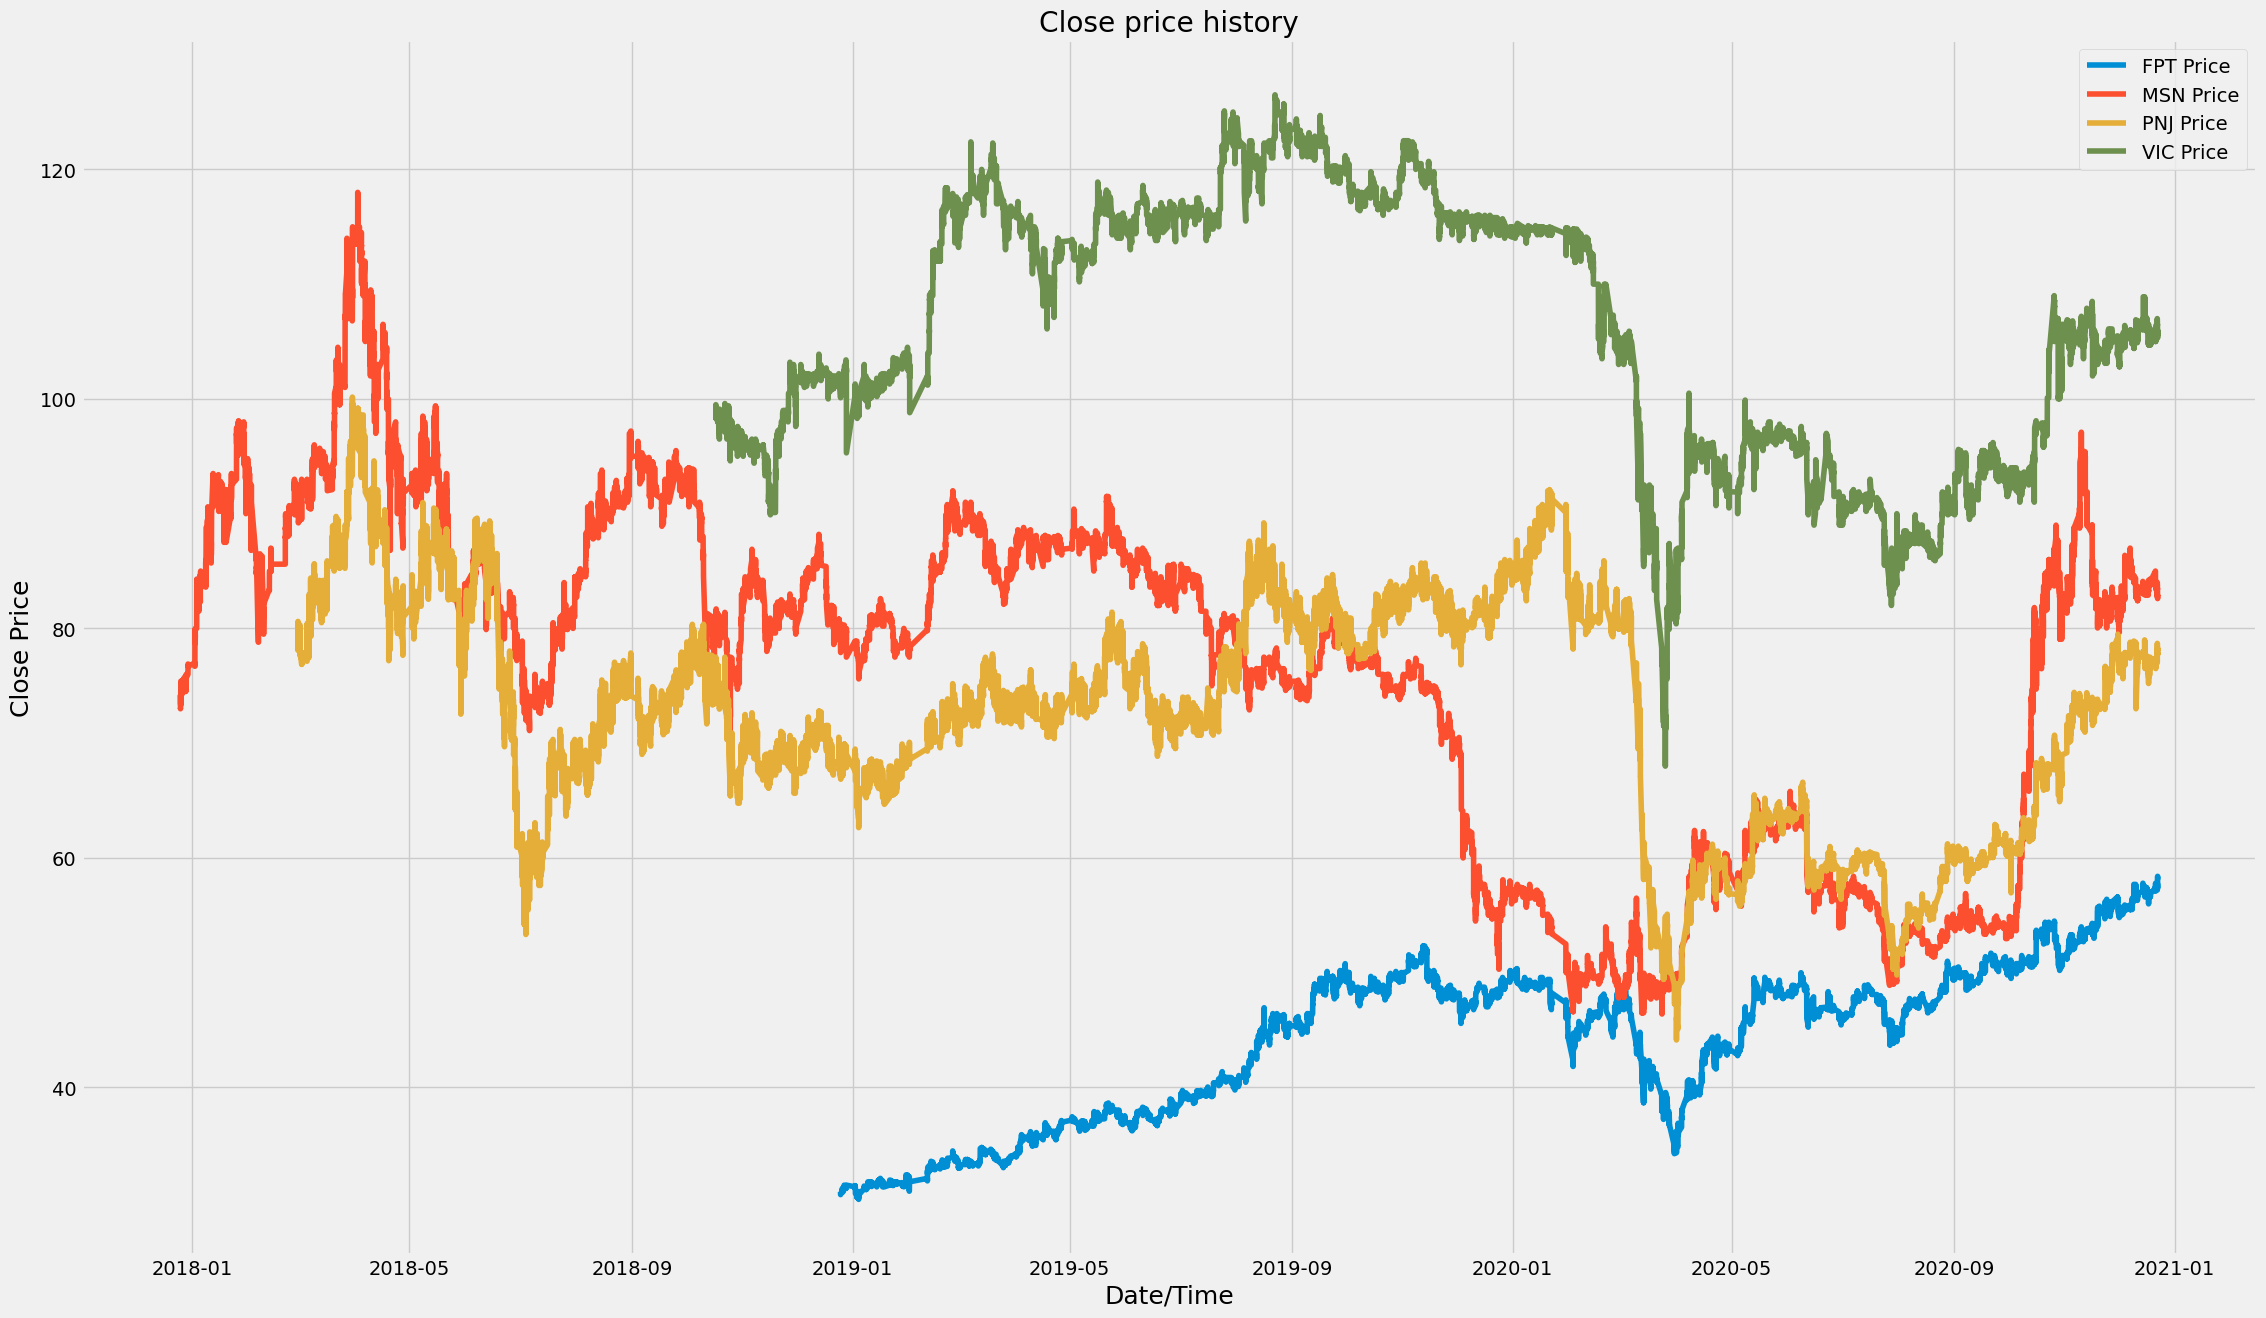

In [7]:
plt.figure(figsize=(25,15))
plt.title("Close price history")
plt.plot(fpt_df['Date/Time'],fpt_df['Close'], label='FPT Price')
plt.plot(msn_df['Date/Time'],msn_df['Close'], label='MSN Price')
plt.plot(pnj_df['Date/Time'],pnj_df['Close'], label='PNJ Price')
plt.plot(vic_df['Date/Time'],vic_df['Close'], label='VIC Price')
plt.xlabel('Date/Time',fontsize=18)
plt.ylabel('Close Price',fontsize=18);
plt.legend();
plt.show();

### 3. Scaling Data <a class='' id='scaling'></a>

In [8]:
# create a new df with only the 'Close' column
data_fpt=fpt_df.filter(['Close'])
data_msn=msn_df.filter(['Close'])
data_pnj=pnj_df.filter(['Close'])
data_vic=vic_df.filter(['Close'])

In [9]:
# convert to numpy array
dataset_fpt=data_fpt.values
dataset_msn=data_msn.values
dataset_pnj=data_pnj.values
dataset_vic=data_vic.values

In [10]:
#setup number rows to train the model on
training_data_len_fpt=math.ceil(len(dataset_fpt)*.8)
training_data_len_msn=math.ceil(len(dataset_msn)*.8)
training_data_len_pnj=math.ceil(len(dataset_pnj)*.8)
training_data_len_vic=math.ceil(len(dataset_vic)*.8)

In [44]:
training_data_len_fpt,training_data_len_msn

(77925, 108284)

In [116]:
#Scale the data
scaler=MinMaxScaler(feature_range=(0,1))
#fpt
scaled_data_fpt=scaler.fit_transform(dataset_fpt)
#msn
scaled_data_msn=scaler.fit_transform(dataset_msn)
#pnj
scaled_data_pnj=scaler.fit_transform(dataset_pnj)
#vic
scaled_data_vic=scaler.fit_transform(dataset_vic)

In [91]:
scaled_data_fpt.shape

(97406, 1)

In [92]:
scaled_data_fpt

array([[0.02273535],
       [0.01989343],
       [0.01740675],
       ...,
       [0.9928952 ],
       [0.98934281],
       [0.98934281]])

### 4. Create the training dataset <a class='' id='train'></a>

In [12]:
# create the scaled training dataset
#fpt
train_data_fpt=scaled_data_fpt[0 : training_data_len_fpt,:]
#msn
train_data_msn=scaled_data_msn[0 : training_data_len_msn,:]
#pnj
train_data_pnj=scaled_data_pnj[0 : training_data_len_pnj,:]
#vic
train_data_vic=scaled_data_vic[0 : training_data_len_vic,:]

#### split the data into x_train and y_train dataset

In [13]:
#fpt
x_train_fpt=[] #training features
y_train_fpt=[] #target 
for i in range(60,len(train_data_fpt)):
    x_train_fpt.append(train_data_fpt[i-60:i,0])
    y_train_fpt.append(train_data_fpt[i,0])
    if i <=61:
        print(x_train_fpt)
        print(y_train_fpt)
        print()

[array([0.02273535, 0.01989343, 0.01740675, 0.01740675, 0.01740675,
       0.01740675, 0.01456483, 0.03055062, 0.03339254, 0.03339254,
       0.03197158, 0.03055062, 0.03055062, 0.03055062, 0.03339254,
       0.03339254, 0.03055062, 0.03445826, 0.03445826, 0.02806394,
       0.02806394, 0.02522202, 0.02522202, 0.02522202, 0.02522202,
       0.02273535, 0.02273535, 0.02522202, 0.02273535, 0.02273535,
       0.02522202, 0.02522202, 0.02806394, 0.03339254, 0.03055062,
       0.03197158, 0.03197158, 0.03055062, 0.03055062, 0.03055062,
       0.03055062, 0.03339254, 0.03339254, 0.03339254, 0.03055062,
       0.03055062, 0.03055062, 0.03055062, 0.03055062, 0.03197158,
       0.03197158, 0.03055062, 0.03197158, 0.03055062, 0.03197158,
       0.03055062, 0.03055062, 0.03055062, 0.03055062, 0.03055062])]
[0.03197158081705154]

[array([0.02273535, 0.01989343, 0.01740675, 0.01740675, 0.01740675,
       0.01740675, 0.01456483, 0.03055062, 0.03339254, 0.03339254,
       0.03197158, 0.03055062, 0.03

#### Convert the x_train and y_train to numpy array

In [14]:
x_train_fpt,y_train_fpt=np.array(x_train_fpt),np.array(y_train_fpt)

In [15]:
#reshape the data
x_train_fpt=np.reshape(x_train_fpt,(x_train_fpt.shape[0],x_train_fpt.shape[1],1))
x_train_fpt.shape

(77865, 60, 1)

### 5. Build the LSTM model <a class='' id='build'></a>

In [17]:
model_fpt=Sequential()
model_fpt.add(LSTM(50, return_sequences=True,input_shape=(x_train_fpt.shape[1],1)))
model_fpt.add(LSTM(50,return_sequences=False))
model_fpt.add(Dense(25))
model_fpt.add(Dense(1))

In [19]:
#Compile the model
model_fpt.compile(optimizer='adam',loss='mean_squared_error')

In [20]:
#train the model

In [122]:
model_fpt.fit(x_train_fpt,y_train_fpt,batch_size=32,epochs=1)

2434/2434 ━━━━━━━━━━━━━━━━━━━━ 180s 73ms/step - loss: 5.4168e-06


In [25]:
#create the testing dataset
#create a new array containing scale values from index 77865 to 97406
test_data_fpt=scaled_data_fpt[training_data_len_fpt - 60: , :]
#create the dataset x_test,y_test
x_test_fpt=[]
y_test_fpt=dataset_fpt[training_data_len_fpt:,:]
for i in range(60,len(test_data_fpt)):
    x_test_fpt.append(test_data_fpt[i-60:i,0])

In [34]:
#convert the data to numpy array
x_test_fpt=np.array(x_test_fpt)

In [30]:
x_test_fpt.shape

(19481, 60)

In [83]:
#reshape the data
x_test_fpt=np.reshape(x_test_fpt,(x_test_fpt.shape[0],x_test_fpt.shape[1],1))
x_test_fpt.shape

(19481, 60, 1)

In [117]:
#get the model predicted the values
predictions_fpt=model_fpt.predict(x_test_fpt)

609/609 ━━━━━━━━━━━━━━━━━━━━ 13s 21ms/step


In [118]:
predictions_fpt=scaler.inverse_transform(predictions_fpt)

In [120]:
#get the root mean squared error (RMSE)
rmse_fpt=np.sqrt(np.mean(predictions_fpt - y_test_fpt)**2)
rmse_fpt

61.43712441376987

In [119]:
predictions_fpt

array([[105.21951],
       [105.2345 ],
       [105.24239],
       ...,
       [125.4046 ],
       [125.40962],
       [125.25241]], dtype=float32)

C:\Users\ngoqu\AppData\Local\Temp\ipykernel_15008\2790622129.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_fpt['Predictions']=predictions_fpt


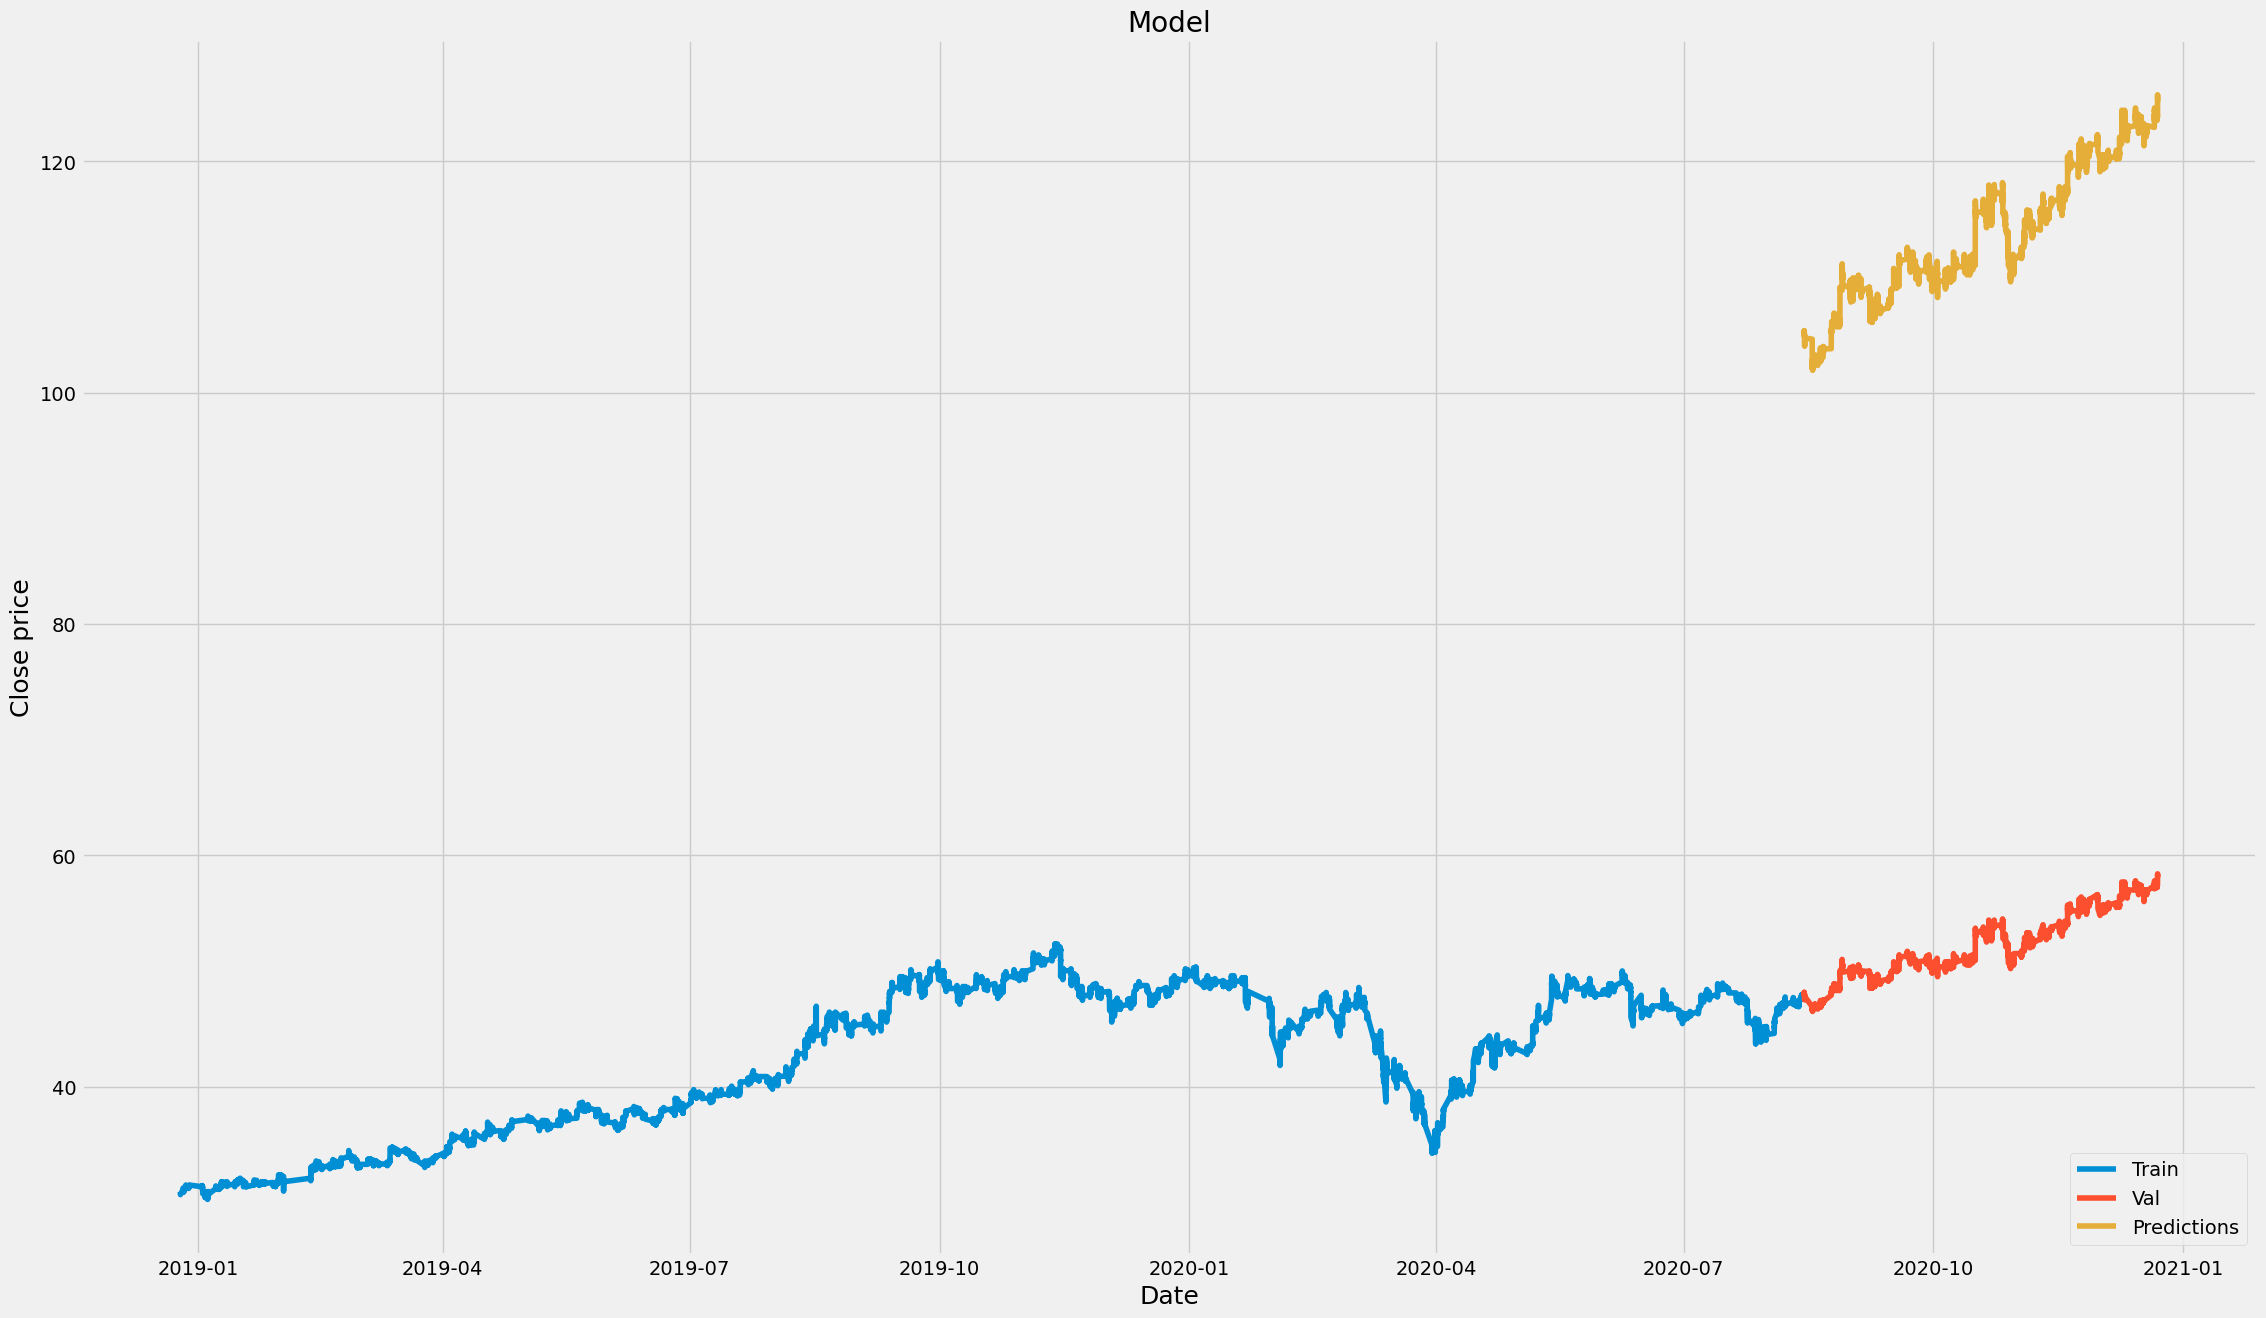

In [121]:
#plot the data
train_fpt=fpt_df[:training_data_len_fpt]
valid_fpt=fpt_df[training_data_len_fpt:]
valid_fpt['Predictions']=predictions_fpt
#visualize the data
plt.figure(figsize=(25,15))
plt.title('Model')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close price',fontsize=18)
plt.plot(train_fpt['Close'])
plt.plot(valid_fpt[['Close','Predictions'
                   ]])
plt.legend(['Train','Val','Predictions'],loc='lower right')
plt.show();